## DSE 309: Advanced Programming in Python


### FINAL PROJECT:  Occupancy Detection using Machine Learning Models  in Python

#### Mohit Limba

#### 18147

#### EECS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Datasets
There are three different .txt file as datatest, datatest2 and datatraining. 

In [2]:
test_df = pd.read_csv("Dataset/datatest.txt")
test_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [4]:
test_df.shape

(2665, 7)

In [5]:
test_df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [6]:
test_df['date'] = pd.to_datetime(test_df['date'])
test_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
test2_df = pd.read_csv("Dataset/datatest2.txt")
test2_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [8]:
test2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [9]:
test2_df.shape

(9752, 7)

In [10]:
test2_df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [11]:
test2_df['date'] = pd.to_datetime(test2_df['date'])
test2_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [12]:
training_df = pd.read_csv("Dataset/datatraining.txt")
training_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [13]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [14]:
training_df.shape

(8143, 7)

In [15]:
training_df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [16]:
training_df['date'] = pd.to_datetime(training_df['date'])
training_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


All text files has seven columns as date, temperature, humidity, light, CO2, humidity ratio and occupancy.

-- Temperature in Celsius.

-- Relative humidity as a percentage.

-- Light measured in lux.

-- Carbon dioxide measured in parts per million.

-- Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.

-- Occupancy as either 1 for occupied or 0 for not occupied.

In [17]:
test_df=test_df.set_index('date')
test_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [18]:
test2_df = test2_df.set_index('date')
test2_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [19]:
training_df=training_df.set_index('date')
training_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


### Data Visualization

In [20]:
import seaborn as sns

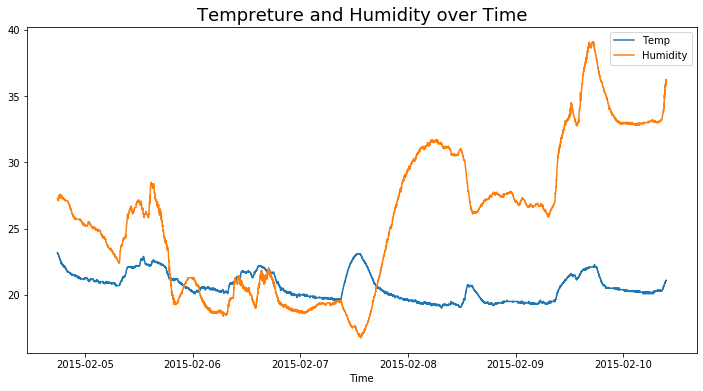

In [21]:
fig=plt.figure(figsize=(12,6))
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(training_df.index,training_df.Temperature,label='Temp')
plt.plot(training_df.index,training_df.Humidity,label='Humidity')
plt.legend()
plt.title('Tempreture and Humidity over Time',size=18)
plt.xlabel("Time")
plt.show()

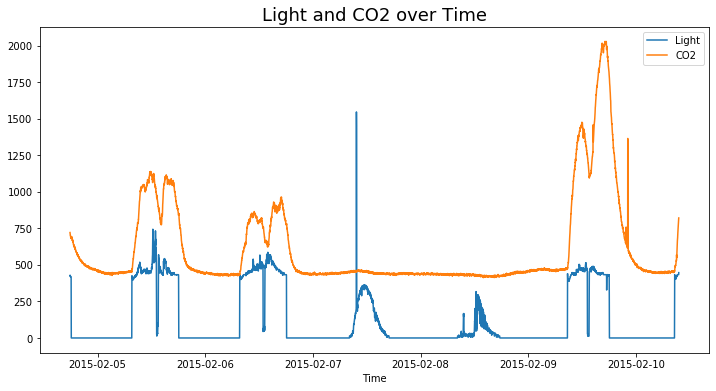

In [22]:
fig=plt.figure(figsize=(12,6))
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(training_df.index,training_df.Light,label='Light')
plt.plot(training_df.index,training_df.CO2,label='CO2')
plt.legend()
plt.title('Light and CO2 over Time',size=18)
plt.xlabel("Time")
plt.show()

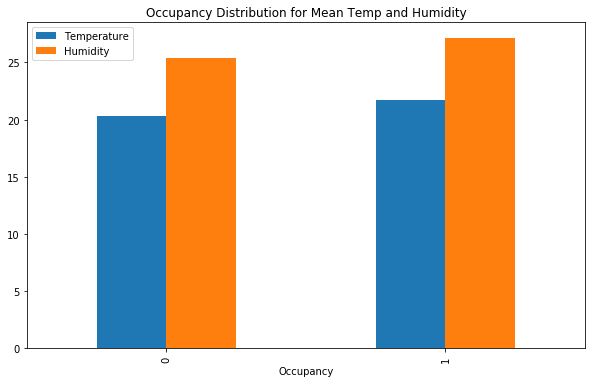

In [23]:
training_df.groupby('Occupancy')[['Temperature','Humidity']].mean().plot(kind='bar',figsize=(10,6),
                                                                        title='Occupancy Distribution for Mean Temp and Humidity')
plt.show()

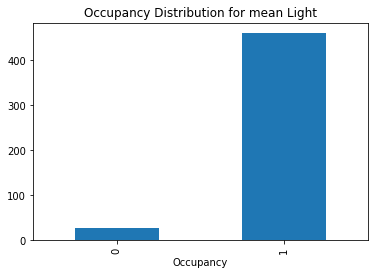

In [24]:
training_df.groupby('Occupancy')['Light'].mean().plot(y='Mean Light',kind='bar',
                                                      title='Occupancy Distribution for mean Light')
plt.show()

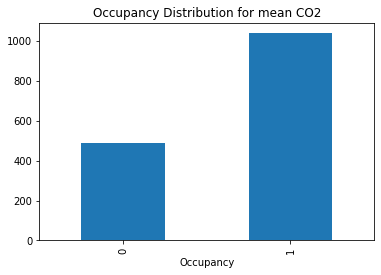

In [25]:
training_df.groupby('Occupancy')['CO2'].mean().plot(kind='bar', title='Occupancy Distribution for mean CO2')

plt.show()

### Correlation

In [26]:
correlation = training_df.corr()
correlation

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


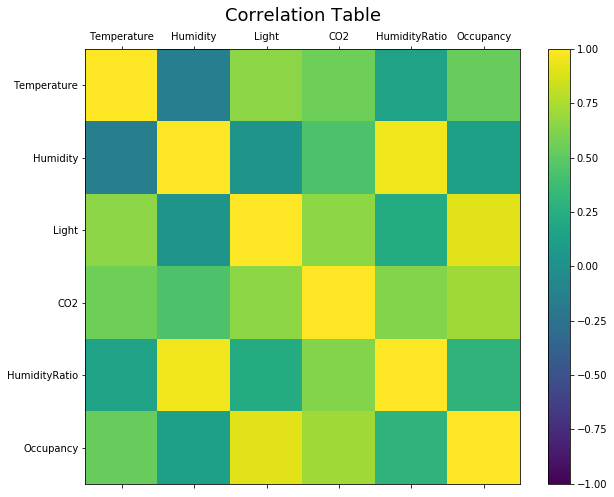

In [27]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
cax=ax.matshow(correlation,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(training_df.columns))
ax.set_yticklabels(list(training_df.columns))
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)
ax.set_title('Correlation Table', size=18)
plt.show()

(6.0, 0.0)

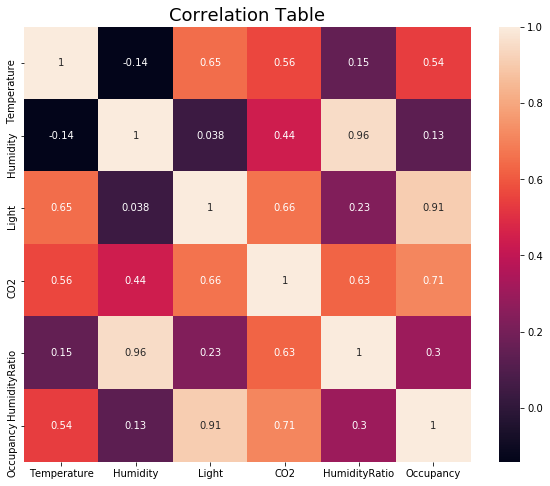

In [28]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table', fontdict={'fontsize':18})
ax = sns.heatmap(correlation, annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

### Scatter Matrix

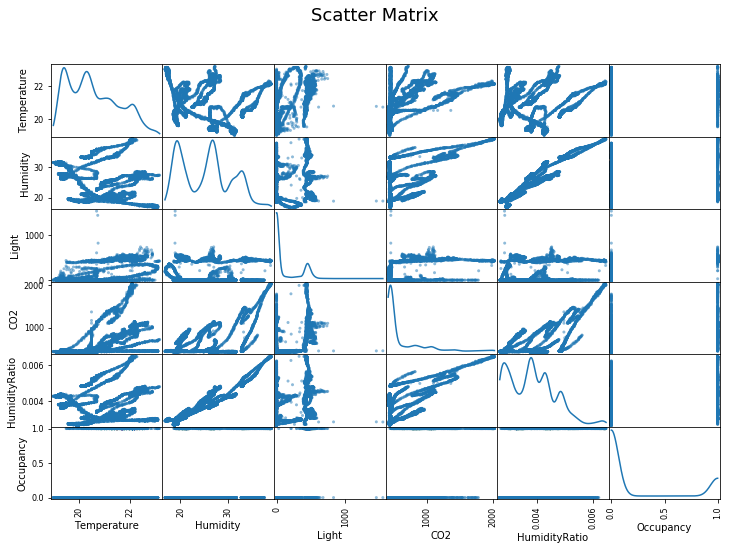

In [29]:

pd.plotting.scatter_matrix(training_df,diagonal='kde',figsize=(12,8))
plt.suptitle('Scatter Matrix',size=18)
plt.show()

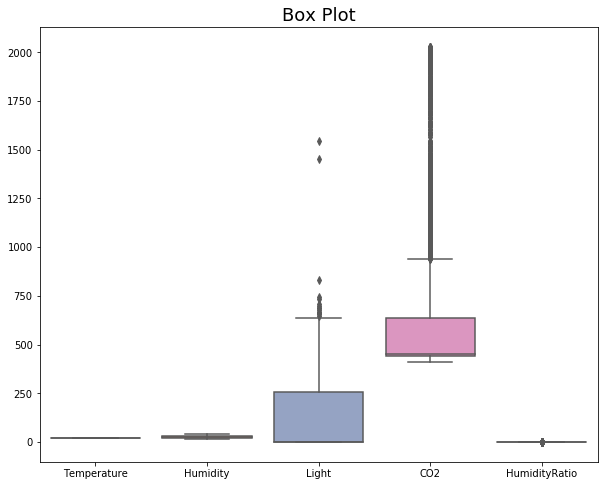

In [30]:
plt.figure(figsize=(10,8))
plt.title('Box Plot', fontdict={'fontsize':18})
ax = sns.boxplot(data=training_df.drop([ 'Occupancy'],axis=1),  palette="Set2")


In the above box plot we unable to visualize some Fratures like Temperature , Humidity and Humidity Ratio because of 
large gap in values of these Features so we use Preprocessing of Data to Overcome this problem  

### Data Preprocessing

we use MinMaxScaler to preprocess our data

In [31]:
 from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
rescaled_training = scaler.fit_transform(np.array(training_df[columns]))
training_df[columns] = rescaled_training
training_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,1.000000,0.470533,0.275490,0.190933,0.557318,1
2015-02-04 17:51:59,0.992823,0.470332,0.277754,0.186446,0.554807,1
2015-02-04 17:53:00,0.992823,0.469326,0.275490,0.186136,0.553761,1
2015-02-04 17:54:00,0.992823,0.467315,0.275490,0.182887,0.551669,1
2015-02-04 17:55:00,0.980861,0.467315,0.275490,0.180566,0.547851,1


In [33]:
rescaled_test = scaler.fit_transform(np.array(test_df[columns]))
test_df[columns] = rescaled_test
test_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,0.831683,0.445132,0.344793,0.330033,0.704212,1
2015-02-02 14:19:59,0.835960,0.447053,0.340787,0.341523,0.708308,1
2015-02-02 14:21:00,0.838812,0.440651,0.337409,0.351030,0.704689,1
2015-02-02 14:22:00,0.837030,0.429448,0.290912,0.356245,0.694383,1
2015-02-02 14:23:00,0.844515,0.437450,0.287877,0.360605,0.705384,1


In [34]:
rescaled_test2 = scaler.fit_transform(np.array(test2_df[columns]))
test2_df[columns] = rescaled_test2
test2_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-11 14:48:00,0.462168,0.525565,0.276618,0.342373,0.700223,1
2015-02-11 14:49:00,0.468303,0.518004,0.276618,0.323736,0.695239,1
2015-02-11 14:50:00,0.463701,0.524950,0.274510,0.326092,0.700447,1
2015-02-11 14:51:00,0.463701,0.524950,0.277672,0.329704,0.700447,1
2015-02-11 14:51:59,0.468303,0.525565,0.276618,0.327296,0.703947,1


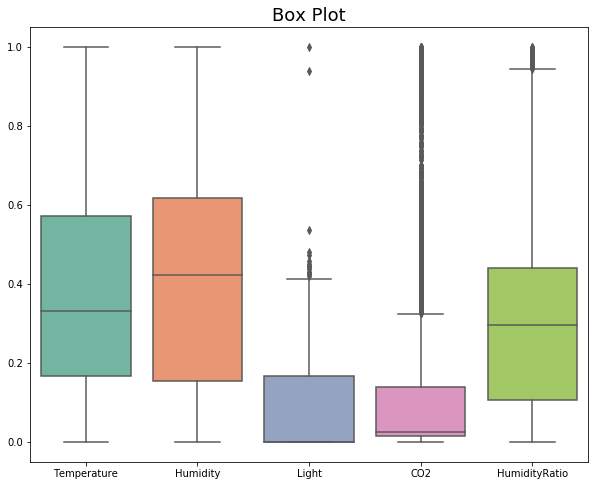

In [35]:
plt.figure(figsize=(10,8))
plt.title('Box Plot', fontdict={'fontsize':18})
ax = sns.boxplot(data=training_df.drop([ 'Occupancy'],axis=1),  palette="Set2")


After preprocessing we Easily Visvualize our data 

scatter plot after Preprocesing

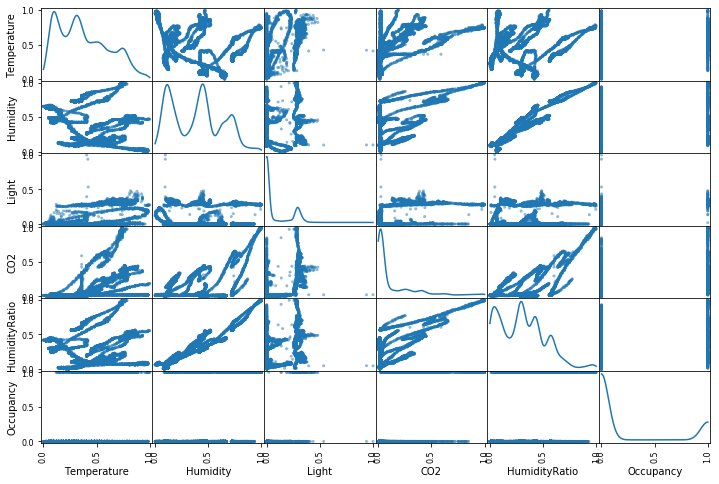

In [36]:
pd.plotting.scatter_matrix(training_df,diagonal='kde',figsize=(12,8))
plt.show()

C:\Users\mohit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mohit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


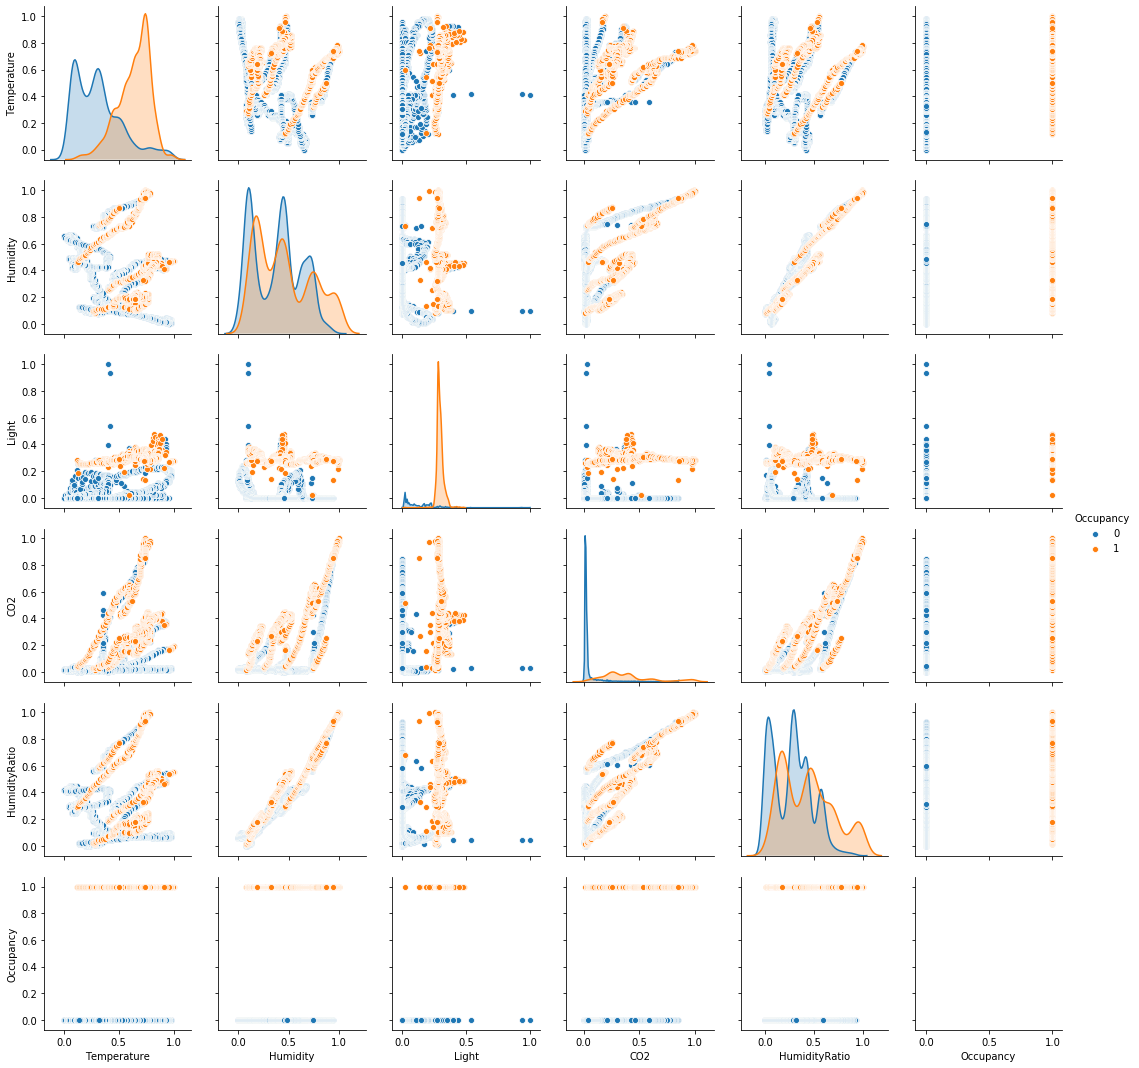

In [37]:
sns.pairplot(training_df,kind='scatter',hue='Occupancy')
plt.show()

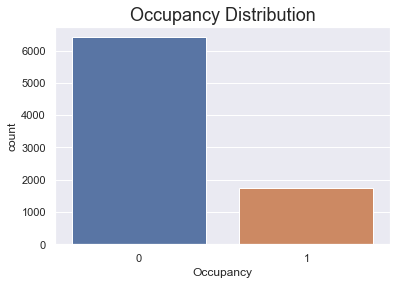

In [38]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=training_df)

### Data Analysis

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler


For training and testing the models, I will use I will use datatraining(8143 instances) as training, datatest(2665 instances) as validation and 
datatest2(9752 instances) as test data.

In [40]:
X_train = training_df.drop(columns=[ 'Occupancy'], axis=1)
y_train = training_df['Occupancy']
X_validation = test_df.drop(columns=[ 'Occupancy'], axis=1)
y_validation = test_df['Occupancy']
X_test = test2_df.drop(columns=[ 'Occupancy'], axis=1)
y_test = test2_df['Occupancy']

### 1) KNN Model

 Paramrter Tuining 

In [41]:
n_neighbors_list = [7,15,45,98,135,200]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model1 = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model1.fit(X_train, y_train)
            
            accuracy = knn_model1.score(X_validation, y_validation)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

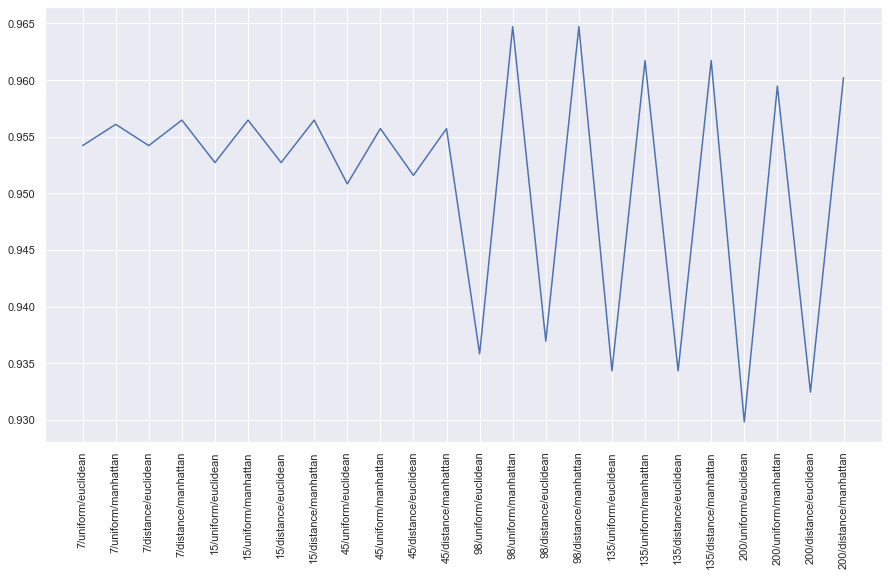

In [42]:
acc_df = pd.DataFrame()
acc_df['Parameters'] = accuracies.keys()
acc_df['Accuracy'] = accuracies.values()
fig=plt.figure(figsize=(15,8))
plt.plot(acc_df.Parameters,acc_df.Accuracy)
plt.xticks(rotation=90)
plt.show()

In [43]:
acc_df[acc_df.Accuracy==acc_df.Accuracy.max()]

,Parameters,Accuracy
13,98/uniform/manhattan,0.964728
15,98/distance/manhattan,0.964728


From the above plot we can see that accuracy for Manhattan Matric is greater than Eludian matric.
Now we search for no. of neighbors for which accuracy is maximum

In [44]:
accuraciess = {}
for n in range(1,200):
    knn_model1 = KNeighborsClassifier(n_neighbors=n,metric='manhattan')
    knn_model1.fit(X_train, y_train)
            
    accuracys = knn_model1.score(X_validation, y_validation)
    accuraciess[str(n)] = accuracys


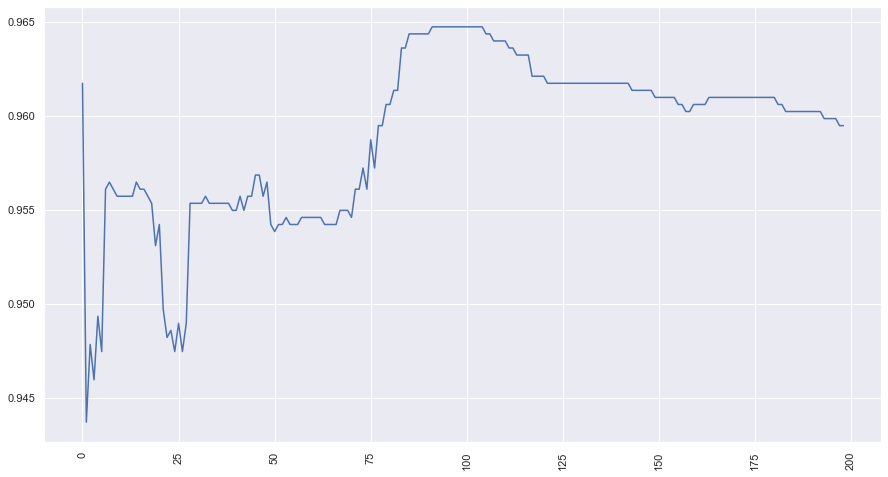

In [45]:
acc_n_df = pd.DataFrame()
acc_n_df['Neighbors'] = accuraciess.keys()
acc_n_df['Accuracy'] = accuraciess.values()
fig=plt.figure(figsize=(15,8))
plt.plot(acc_n_df.index,acc_n_df.Accuracy)
plt.xticks(rotation=90)
plt.show()

In [46]:
acc_n_df[acc_n_df.Accuracy==acc_n_df.Accuracy.max()]

,Neighbors,Accuracy
91,92,0.964728
92,93,0.964728
93,94,0.964728
94,95,0.964728
95,96,0.964728
96,97,0.964728
97,98,0.964728
98,99,0.964728
99,100,0.964728
100,101,0.964728


There is a range of neighbors for which accuracy is maximum i.e from 92 to 105 

Now We will use Hyperparameter Tuning using GridSearchCV 


In [47]:
knn_model=KNeighborsClassifier()
knn_params={    'n_neighbors': (92,106, 1),
              'weights': ('uniform', 'distance'),
              'metric': ('euclidean', 'manhattan','minkowski')
}

In [48]:
knn_gs=GridSearchCV(knn_model,knn_params,scoring="accuracy" ,n_jobs = -1,cv = 5)

In [49]:
knn_gs_model=knn_gs.fit(X_train,y_train)

In [50]:
knn_gs_model.best_score_

0.9362642760653321

In [51]:
knn_gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 92, 'weights': 'uniform'}

In [52]:
knn_gs_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=92, p=2,
                     weights='uniform')

best HyperParameters for KNN-
{'metric': 'manhattan', 'n_neighbors': 92, 'weights': 'uniform'}

In [53]:
knn_model1 = KNeighborsClassifier(n_neighbors=92,weights='uniform',metric='manhattan')
knn_model1.fit(X_train, y_train)
y_pred_knn = knn_model1.predict(X_validation)
y_pred_knn


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
confusion_metrix_knn=metrics.confusion_matrix(y_validation,y_pred_knn)
print(f'Confusion_metrix for Validation Data:\n{confusion_metrix_knn}')

Confusion_metrix for Validation Data:
[[1621   72]
 [  22  950]]


(2.0, 0.0)

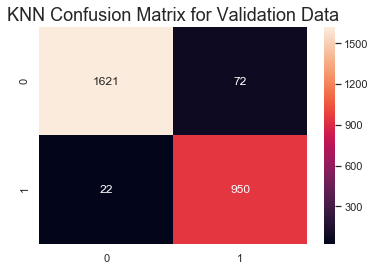

In [55]:
ax = sns.heatmap(confusion_matrix(y_validation, y_pred_knn), annot=True, fmt="d")
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [56]:
accuracy_knn = metrics.accuracy_score(y_validation,y_pred_knn)
accuracy_knn=accuracy_knn*100
accuracy_knn = float("{0:.4f}".format(accuracy_knn))
print(f'Accuracy for KNN on Validation Data:{accuracy_knn} %')    

Accuracy for KNN on Validation Data:96.4728 %


In [57]:
precision_knn=metrics.precision_score(y_validation,y_pred_knn,average=None)
print(f'Precision for KNN on Validation Data :{precision_knn} ') 

Precision for KNN on Validation Data :[0.98660986 0.9295499 ] 


In [58]:
report_knn = metrics.classification_report(y_validation, y_pred_knn)
print(f'Classification Report for KNN on Validation Data-- \n\n {report_knn}')

Classification Report for KNN on Validation Data-- 

               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1693
           1       0.93      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.97      0.96      2665
weighted avg       0.97      0.96      0.96      2665



In [59]:
knn_model_df=pd.DataFrame({'actual':y_validation, 'predicted':y_pred_knn})
knn_model_df

,actual,predicted
date,,
2015-02-02 14:19:00,1,1
2015-02-02 14:19:59,1,1
2015-02-02 14:21:00,1,1
2015-02-02 14:22:00,1,1
2015-02-02 14:23:00,1,1
...,...,...
2015-02-04 10:38:59,1,1
2015-02-04 10:40:00,1,1
2015-02-04 10:40:59,1,1


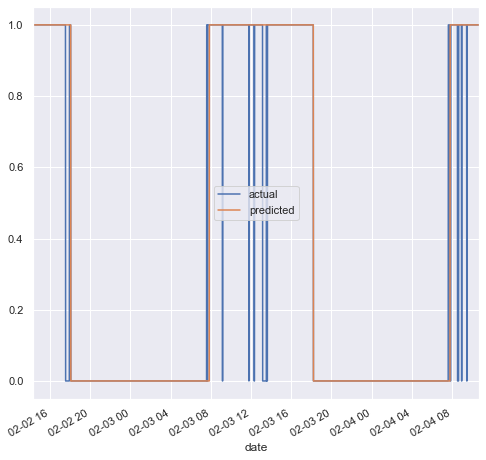

In [60]:
knn_model_df.plot(figsize=(8,8))
plt.show()

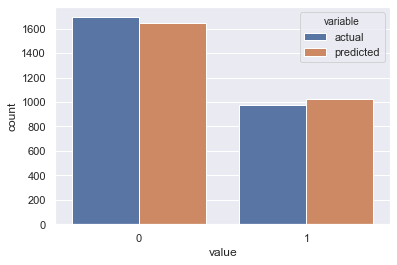

In [62]:
sns.countplot(x="value", hue="variable", data=pd.melt(knn_model_df))
plt.show()

### 2) SVM (Support Vector Machine)

In [63]:
from sklearn.svm import SVC

In [64]:
svm_model=SVC()
svm_params= {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']}

In [65]:
svm_gs=GridSearchCV(svm_model,svm_params,  refit = True,cv=5)

In [66]:
svm_gs_model=svm_gs.fit(X_train,y_train)

In [67]:
svm_gs_model.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [68]:
svm_gs_model.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
svm_gs_model.score(X_validation, y_validation)

0.9786116322701689

In [70]:
svm_model1=SVC(C= 100, gamma= 0.1, kernel= 'sigmoid')
svm_model1.fit(X_train,y_train)
y_pred_svm=svm_model1.predict(X_validation)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [71]:
confusion_metrix_svm = metrics.confusion_matrix(y_validation,y_pred_svm)
print(f'Confusion_metrix for SVM on Validation Data:\n{confusion_metrix_svm}')

Confusion_metrix for SVM on Validation Data:
[[1638   55]
 [   2  970]]


(2.0, 0.0)

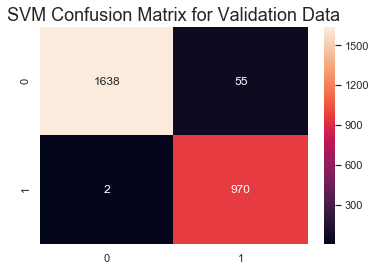

In [72]:
ax = sns.heatmap(confusion_matrix(y_validation, y_pred_svm), annot=True, fmt="d")
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [73]:
accuracy_svm = metrics.accuracy_score(y_validation,y_pred_svm)
accuracy_svm=accuracy_svm*100
accuracy_svm = float("{0:.4f}".format(accuracy_svm))
print(f'Accuracy for SVM on Validation Data:{accuracy_svm} %')

Accuracy for SVM on Validation Data:97.8612 %


In [74]:
precision_svm = metrics.precision_score(y_validation,y_pred_svm,average=None)
print(f'Precision for SVM on Validation Data :{precision_svm} ') 

Precision for SVM on Validation Data :[0.99878049 0.94634146] 


In [75]:
report_svm = metrics.classification_report(y_validation, y_pred_svm)
print(f'Classification Report for SVM on Validation Data-- \n\n {report_svm}')

Classification Report for SVM on Validation Data-- 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [76]:
svm_model_df=pd.DataFrame({'actual':y_validation, 'predicted':y_pred_svm})
svm_model_df

,actual,predicted
date,,
2015-02-02 14:19:00,1,1
2015-02-02 14:19:59,1,1
2015-02-02 14:21:00,1,1
2015-02-02 14:22:00,1,1
2015-02-02 14:23:00,1,1
...,...,...
2015-02-04 10:38:59,1,1
2015-02-04 10:40:00,1,1
2015-02-04 10:40:59,1,1


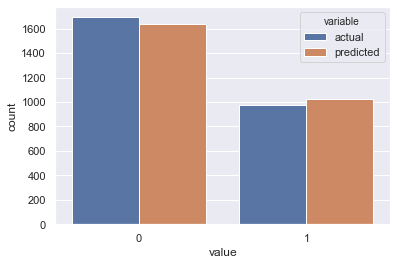

In [77]:
sns.countplot(x="value", hue="variable", data=pd.melt(svm_model_df))
plt.show()

### 3) Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr_model= LogisticRegression()
lr_params= {'C': [0.01,0.1, 1, 10, 100, 1000],
              'solver' : [ 'liblinear'],
              'penalty' : ['l2','l1']}

In [80]:
lr_gs=GridSearchCV(lr_model,lr_params,  refit = True,cv=5)

In [81]:
lr_gs_model=lr_gs.fit(X_train,y_train)

In [82]:
lr_gs_model.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [83]:
lr_gs_model.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
lr_gs_model.score(X_validation,y_validation)

0.9789868667917448

In [85]:
lr_model1=LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
lr_model1.fit(X_train,y_train)
y_pred_lr=lr_model1.predict(X_validation)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [86]:
confusion_metrix_lr = metrics.confusion_matrix(y_validation,y_pred_lr)
print(f'Confusion_metrix for LR on Validation Data:\n{confusion_metrix_lr}')

Confusion_metrix for LR on Validation Data:
[[1638   55]
 [   1  971]]


(2.0, 0.0)

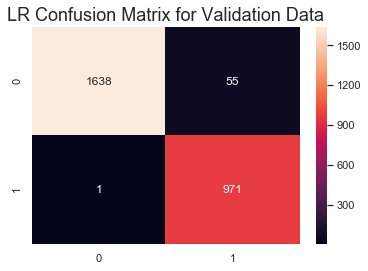

In [87]:
ax = sns.heatmap(confusion_matrix(y_validation, y_pred_lr), annot=True, fmt="d")
plt.title("LR Confusion Matrix for Validation Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [88]:
accuracy_lr = metrics.accuracy_score(y_validation,y_pred_lr)
accuracy_lr=accuracy_lr*100
accuracy_lr = float("{0:.4f}".format(accuracy_lr))
print(f'Accuracy for LR on Validation Data:{accuracy_lr} %')

Accuracy for LR on Validation Data:97.8987 %


In [89]:
precision_lr = metrics.precision_score(y_validation,y_pred_lr,average=None)
print(f'Precision for LR on Validation Data :{precision_lr} ') 

Precision for LR on Validation Data :[0.99938987 0.94639376] 


In [90]:
report_lr = metrics.classification_report(y_validation, y_pred_lr)
print(f'Classification Report for LR on Validation Data-- \n\n {report_lr}')

Classification Report for LR on Validation Data-- 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [91]:
lr_model_df=pd.DataFrame({'actual':y_validation, 'predicted':y_pred_lr})
lr_model_df

,actual,predicted
date,,
2015-02-02 14:19:00,1,1
2015-02-02 14:19:59,1,1
2015-02-02 14:21:00,1,1
2015-02-02 14:22:00,1,1
2015-02-02 14:23:00,1,1
...,...,...
2015-02-04 10:38:59,1,1
2015-02-04 10:40:00,1,1
2015-02-04 10:40:59,1,1


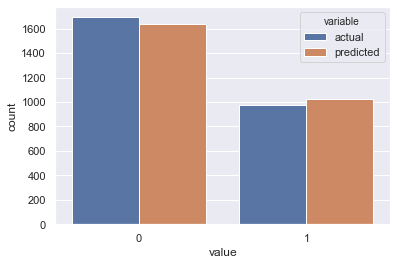

In [92]:
sns.countplot(x="value", hue="variable", data=pd.melt(lr_model_df))
plt.show()

### 4) RandomForestClassifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc_model = RandomForestClassifier()
rfc_params={'n_estimators' : [10, 100, 1000],
             'max_features' : ['sqrt', 'log2']}

In [95]:
rfc_gs=GridSearchCV(rfc_model,rfc_params,  refit = True,cv=5)

In [96]:
rfc_gs_model=rfc_gs.fit(X_train,y_train)

In [97]:
rfc_gs_model.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [98]:
rfc_gs_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
rfc_gs_model.score(X_validation,y_validation)

0.9759849906191369

In [100]:
rfc_model1=RandomForestClassifier(max_features= 'sqrt', n_estimators = 100)
rfc_model1.fit(X_train,y_train)
y_pred_rfc=rfc_model1.predict(X_validation)
y_pred_rfc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [102]:
confusion_metrix_rfc = metrics.confusion_matrix(y_validation,y_pred_rfc)
print(f'Confusion_metrix for RFC on Validation Data:\n{confusion_metrix_rfc}')

Confusion_metrix for RFC on Validation Data:
[[1638   55]
 [   4  968]]


(2.0, 0.0)

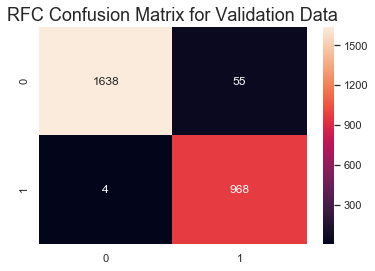

In [101]:
ax = sns.heatmap(confusion_matrix(y_validation, y_pred_rfc), annot=True, fmt="d")
plt.title("RFC Confusion Matrix for Validation Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [103]:
accuracy_rfc = metrics.accuracy_score(y_validation,y_pred_rfc)
accuracy_rfc=accuracy_rfc*100
accuracy_rfc = float("{0:.4f}".format(accuracy_rfc))
print(f'Accuracy for RFC on Validation Data:{accuracy_rfc} %')

Accuracy for RFC on Validation Data:97.7861 %


In [104]:
precision_rfc = metrics.precision_score(y_validation,y_pred_rfc,average=None)
print(f'Precision for RFC on Validation Data :{precision_rfc} ') 

Precision for RFC on Validation Data :[0.99756395 0.94623656] 


In [105]:
report_rfc = metrics.classification_report(y_validation, y_pred_rfc)
print(f'Classification Report for RFC on Validation Data-- \n\n {report_rfc}')

Classification Report for RFC on Validation Data-- 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [106]:
rfc_model_df=pd.DataFrame({'actual':y_validation, 'predicted':y_pred_rfc})
rfc_model_df

,actual,predicted
date,,
2015-02-02 14:19:00,1,1
2015-02-02 14:19:59,1,1
2015-02-02 14:21:00,1,1
2015-02-02 14:22:00,1,1
2015-02-02 14:23:00,1,1
...,...,...
2015-02-04 10:38:59,1,1
2015-02-04 10:40:00,1,1
2015-02-04 10:40:59,1,1


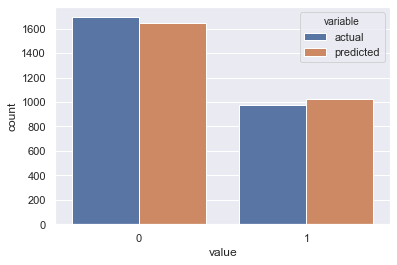

In [107]:
sns.countplot(x="value", hue="variable", data=pd.melt(rfc_model_df))
plt.show()

## Comparing Performaces Of all The Models On TEST DATA ---

## 1) KNN 

In [109]:
yt_pred_knn =knn_model1.predict(X_test)
yt_pred_knn


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [110]:
accuracy_test_knn = metrics.accuracy_score(y_test,yt_pred_knn)
accuracy_test_knn=accuracy_test_knn*100
accuracy_test_knn = float("{0:.4f}".format(accuracy_test_knn))
print(f'Accuracy for KNN on TEST Data:{accuracy_test_knn} %') 
print('--------------------------------------------------')
precision_test_knn=metrics.precision_score(y_test,yt_pred_knn,average=None)
print(f'Precision for KNN on TEST Data :{precision_test_knn} ') 
print('--------------------------------------------------')
report_test_knn = metrics.classification_report(y_test, yt_pred_knn)
print(f'Classification Report for KNN on TEST Data-- \n\n {report_test_knn}')
print('--------------------------------------------------')
confusion_metrix_test_knn=metrics.confusion_matrix(y_test,yt_pred_knn)
print(f'Confusion_metrix for TEST Data:\n{confusion_metrix_test_knn}')

Accuracy for KNN on TEST Data:98.6874 %
--------------------------------------------------
Precision for KNN on TEST Data :[0.99271497 0.96513317] 
--------------------------------------------------
Classification Report for KNN on TEST Data-- 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.97      0.97      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752

--------------------------------------------------
Confusion_metrix for TEST Data:
[[7631   72]
 [  56 1993]]


(2.0, 0.0)

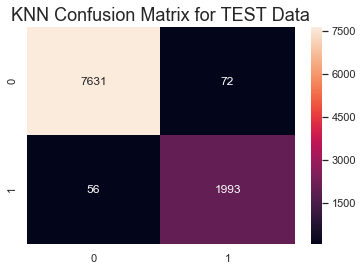

In [111]:
ax = sns.heatmap(confusion_matrix(y_test, yt_pred_knn), annot=True, fmt="d")
plt.title("KNN Confusion Matrix for TEST Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [112]:
knn_model_test_df=pd.DataFrame({'actual':y_test, 'predicted':yt_pred_knn})
knn_model_test_df

,actual,predicted
date,,
2015-02-11 14:48:00,1,1
2015-02-11 14:49:00,1,1
2015-02-11 14:50:00,1,1
2015-02-11 14:51:00,1,1
2015-02-11 14:51:59,1,1
...,...,...
2015-02-18 09:15:00,1,1
2015-02-18 09:16:00,1,1
2015-02-18 09:16:59,1,1


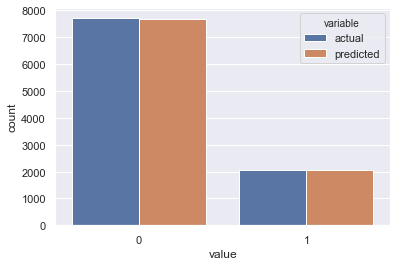

In [113]:
sns.countplot(x="value", hue="variable", data=pd.melt(knn_model_test_df))
plt.show()

## 2) SVM(Support-Vector Machine)

In [114]:
yt_pred_svm=svm_model1.predict(X_test)
yt_pred_svm

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [115]:
accuracy_test_svm = metrics.accuracy_score(y_test,yt_pred_svm)
accuracy_test_svm=accuracy_test_svm*100
accuracy_test_svm = float("{0:.4f}".format(accuracy_test_svm))
print(f'Accuracy for SVM on TEST Data:{accuracy_test_svm} %') 
print('--------------------------------------------------')
precision_test_svm=metrics.precision_score(y_test,yt_pred_svm,average=None)
print(f'Precision for SVM on TEST Data :{precision_test_svm} ') 
print('--------------------------------------------------')
report_test_svm = metrics.classification_report(y_test, yt_pred_svm)
print(f'Classification Report for SVM on TEST Data-- \n\n {report_test_svm}')
print('--------------------------------------------------')
confusion_metrix_test_svm=metrics.confusion_matrix(y_test,yt_pred_svm)
print(f'Confusion_metrix for TEST Data for SVM:\n{confusion_metrix_test_svm}')

Accuracy for SVM on TEST Data:99.2514 %
--------------------------------------------------
Precision for SVM on TEST Data :[0.99843219 0.97092469] 
--------------------------------------------------
Classification Report for SVM on TEST Data-- 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752

--------------------------------------------------
Confusion_metrix for TEST Data for SVM:
[[7642   61]
 [  12 2037]]


(2.0, 0.0)

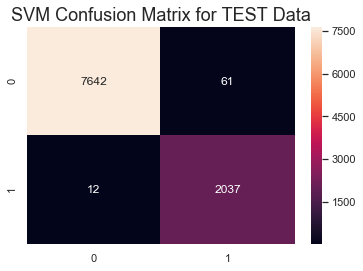

In [116]:
ax = sns.heatmap(confusion_matrix(y_test, yt_pred_svm), annot=True, fmt="d")
plt.title("SVM Confusion Matrix for TEST Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [117]:
svm_model_test_df=pd.DataFrame({'actual':y_test, 'predicted':yt_pred_svm})
svm_model_test_df

,actual,predicted
date,,
2015-02-11 14:48:00,1,1
2015-02-11 14:49:00,1,1
2015-02-11 14:50:00,1,1
2015-02-11 14:51:00,1,1
2015-02-11 14:51:59,1,1
...,...,...
2015-02-18 09:15:00,1,1
2015-02-18 09:16:00,1,1
2015-02-18 09:16:59,1,1


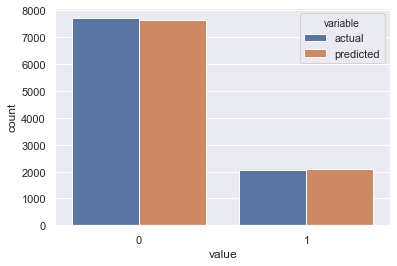

In [118]:
sns.countplot(x="value", hue="variable", data=pd.melt(svm_model_test_df))
plt.show()

## 3) Logistic Regression

In [119]:
yt_pred_lr=lr_model1.predict(X_test)
yt_pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [120]:
accuracy_test_lr = metrics.accuracy_score(y_test,yt_pred_lr)
accuracy_test_lr=accuracy_test_lr*100
accuracy_test_lr = float("{0:.4f}".format(accuracy_test_lr))
print(f'Accuracy for LR on TEST Data:{accuracy_test_lr} %') 
print('--------------------------------------------------')
precision_test_lr=metrics.precision_score(y_test,yt_pred_lr,average=None)
print(f'Precision for LR on TEST Data :{precision_test_lr} ') 
print('--------------------------------------------------')
report_test_lr = metrics.classification_report(y_test, yt_pred_lr)
print(f'Classification Report for LR on TEST Data-- \n\n {report_test_lr}')
print('--------------------------------------------------')
confusion_metrix_test_lr=metrics.confusion_matrix(y_test,yt_pred_lr)
print(f'Confusion_metrix for TEST Data for LR:\n{confusion_metrix_test_lr}')

Accuracy for LR on TEST Data:99.1386 %
--------------------------------------------------
Precision for LR on TEST Data :[0.99816922 0.96674584] 
--------------------------------------------------
Classification Report for LR on TEST Data-- 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752

--------------------------------------------------
Confusion_metrix for TEST Data for LR:
[[7633   70]
 [  14 2035]]


(2.0, 0.0)

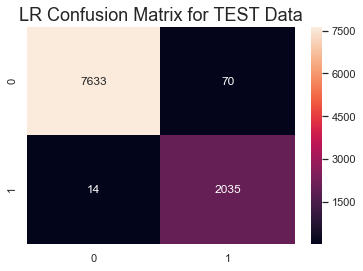

In [121]:
ax = sns.heatmap(confusion_matrix(y_test, yt_pred_lr), annot=True, fmt="d")
plt.title("LR Confusion Matrix for TEST Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [122]:
lr_model_test_df=pd.DataFrame({'actual':y_test, 'predicted':yt_pred_lr})
lr_model_test_df

,actual,predicted
date,,
2015-02-11 14:48:00,1,1
2015-02-11 14:49:00,1,1
2015-02-11 14:50:00,1,1
2015-02-11 14:51:00,1,1
2015-02-11 14:51:59,1,1
...,...,...
2015-02-18 09:15:00,1,1
2015-02-18 09:16:00,1,1
2015-02-18 09:16:59,1,1


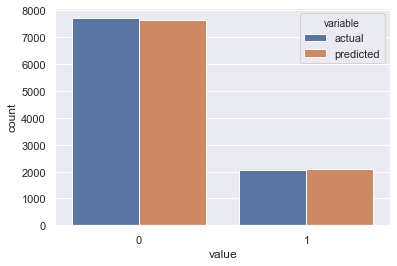

In [123]:
sns.countplot(x="value", hue="variable", data=pd.melt(lr_model_test_df))
plt.show()

## 4) Random Forest Classifier

In [124]:
yt_pred_rfc=rfc_model1.predict(X_test)
yt_pred_rfc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [125]:
accuracy_test_rfc = metrics.accuracy_score(y_test,yt_pred_rfc)
accuracy_test_rfc=accuracy_test_rfc*100
accuracy_test_rfc = float("{0:.4f}".format(accuracy_test_rfc))
print(f'Accuracy for RFC on TEST Data:{accuracy_test_rfc} %') 
print('--------------------------------------------------')
precision_test_rfc=metrics.precision_score(y_test,yt_pred_rfc,average=None)
print(f'Precision for RFC on TEST Data :{precision_test_rfc} ') 
print('--------------------------------------------------')
report_test_rfc = metrics.classification_report(y_test, yt_pred_rfc)
print(f'Classification Report for RFC on TEST Data-- \n\n {report_test_rfc}')
print('--------------------------------------------------')
confusion_metrix_test_rfc=metrics.confusion_matrix(y_test,yt_pred_rfc)
print(f'Confusion_metrix for TEST Data for RFC:\n{confusion_metrix_test_rfc}')

Accuracy for RFC on TEST Data:98.872 %
--------------------------------------------------
Precision for RFC on TEST Data :[0.99698913 0.95882631] 
--------------------------------------------------
Classification Report for RFC on TEST Data-- 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.96      0.99      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.98      9752
weighted avg       0.99      0.99      0.99      9752

--------------------------------------------------
Confusion_metrix for TEST Data for RFC:
[[7616   87]
 [  23 2026]]


(2.0, 0.0)

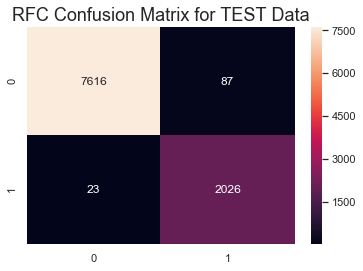

In [126]:
ax = sns.heatmap(confusion_matrix(y_test, yt_pred_rfc), annot=True, fmt="d")
plt.title("RFC Confusion Matrix for TEST Data", fontdict={'fontsize':18})
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5 ,top-0.5)

In [127]:
rfc_model_test_df=pd.DataFrame({'actual':y_test, 'predicted':yt_pred_rfc})
rfc_model_test_df

,actual,predicted
date,,
2015-02-11 14:48:00,1,1
2015-02-11 14:49:00,1,1
2015-02-11 14:50:00,1,1
2015-02-11 14:51:00,1,1
2015-02-11 14:51:59,1,1
...,...,...
2015-02-18 09:15:00,1,1
2015-02-18 09:16:00,1,1
2015-02-18 09:16:59,1,1


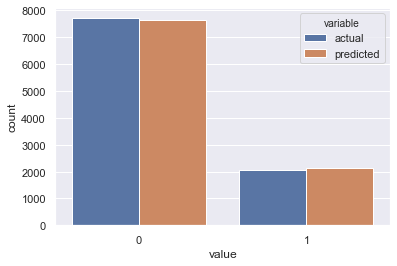

In [128]:
sns.countplot(x="value", hue="variable", data=pd.melt(rfc_model_test_df))
plt.show()

In [129]:
 models={'KNN':accuracy_test_knn ,'SVM':accuracy_test_svm ,
         "Logistic Regresion":accuracy_test_lr,'Random Forest':accuracy_test_rfc}
model=list(models.keys())
accuracy=list(models.values())
print(models)

{'KNN': 98.6874, 'SVM': 99.2514, 'Logistic Regresion': 99.1386, 'Random Forest': 98.872}


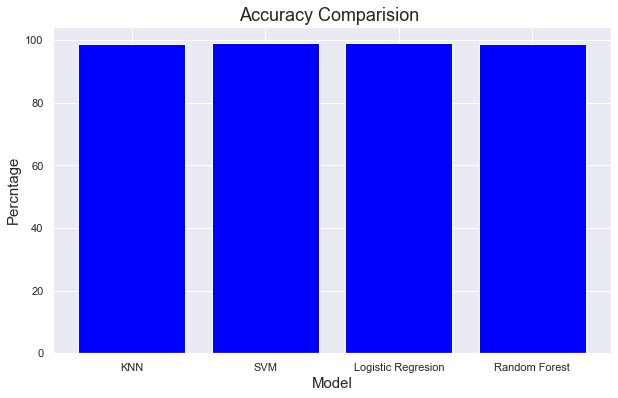

In [130]:
fig=plt.figure(figsize=(10,6))
plt.bar(model,accuracy,color='blue')
plt.title('Accuracy Comparision ',size=18)
plt.ylabel('Percntage',size=15)
plt.xlabel('Model',size=15)
plt.show()

In [131]:
best_model=model[accuracy.index(max(accuracy))]
print(f"Best model is '{best_model}'")


Best model is 'SVM'
